<a href="https://colab.research.google.com/github/Asritha0606/GenerativeAI/blob/main/GenAI_RAG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Contents: Embeddings and Vector Stores

## Section #1

# Embeddings

- An embedding is a vector (list) of floating point numbers.
- The **distance** between two vectors measures their relatedness.
- Small distances suggest high relatedness.
- Large distances suggest low relatedness.

- Word embeddings are a type of representation in NLP where words or phrases from the vocabulary are mapped to vectors of real numbers.
- They are used to capture the semantic and syntactic similarity between words in a high-dimensional space

Ref-
- https://huggingface.co/sentence-transformers
- https://python.langchain.com/docs/integrations/text_embedding/sentence_transformers/
- Nomic Langchain - https://python.langchain.com/docs/integrations/text_embedding/nomic/
- Nomic API - https://atlas.nomic.ai/
- https://docs.trychroma.com/docs/overview/getting-started
- Vector search- https://weaviate.io/blog/vector-search-explained

###Notes:
- Each data point, and the query, are converted into numerical vector representations using these embedding models.
- Each data point vector in a dataset is compared to the query vector at search time.
- This involves similarity calculation - how similar or close are the data point and query vector.
- Based on this closeness we get the results.

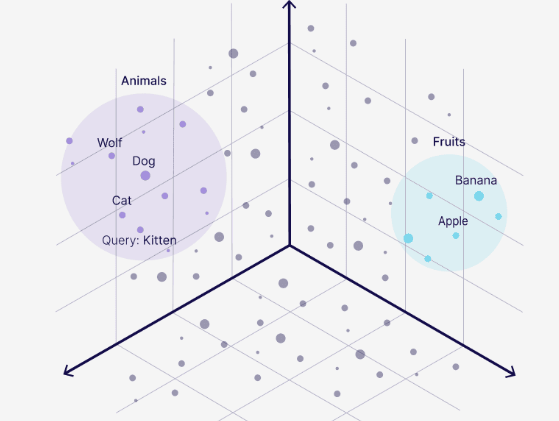

Dot product-

- The Dot Product is a similarity measure and used in cosine similarity calculation.

- Vectors:
  - A = [a1, a2, a3]
  - B = [b1, b2, b3]
  - A.B = a1.b1 + a2.b2 + a3.b3

Cosine Similarity-

- Cosine Similarity is a widely used metric for measuring similarity between two vectors.
- Used in the fields of information retrieval, text mining, and machine learning.
- It measures the cosine of the angle between two vectors.

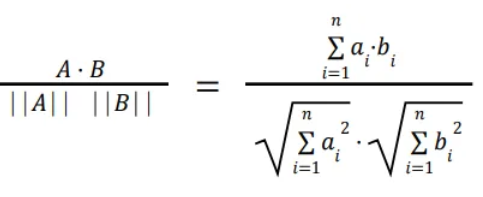

Distance:

1. Manhattan Distance (L1):

- Manhattan Distance, also known as L1 norm or City Block Distance, is a method used to compute the distance between two points in a grid-based path, resembling the layout of streets in a city.

2. Euclidean Distance (L2):

- It calculates the “straight-line” distance between two points in Euclidean space.

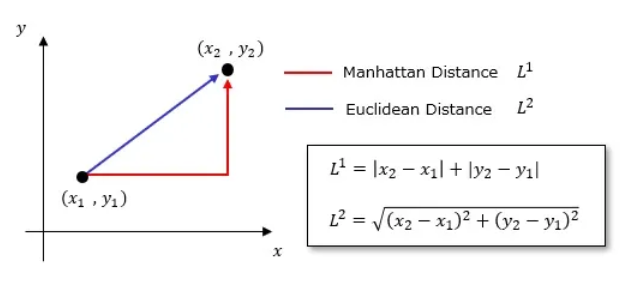

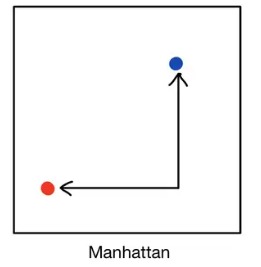

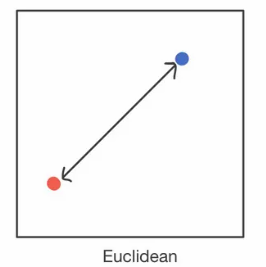

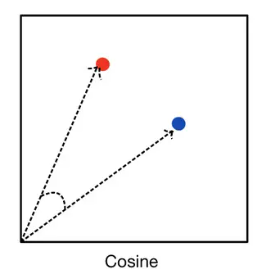

Installs

In [1]:
!pip install -q groq langchain-groq litellm chromadb text-generation langchain sentence-transformers langchain-community langchain_huggingface langchain_nomic fastembed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

In [2]:
import langchain
#loading docs
from langchain_community.document_loaders import PyPDFLoader
from langchain.document_loaders import TextLoader

#loading embeddings
from langchain.embeddings import HuggingFaceEmbeddings
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain.embeddings import SentenceTransformerEmbeddings
from langchain_nomic.embeddings import NomicEmbeddings
from langchain_community.embeddings.fastembed import FastEmbedEmbeddings
from sentence_transformers import SentenceTransformer

# from langchain.chains import RetrievalQA
from langchain.text_splitter import RecursiveCharacterTextSplitter

from chromadb.utils import embedding_functions

# from langchain.prompts import PromptTemplate

# How to load embeddings

- Hugging Face Sentence Transformers Embeddings

1.  Directly from Hugging Face Sentence Transformers

In [3]:
from sentence_transformers import SentenceTransformer

# 1. Load a pretrained Sentence Transformer model
model = SentenceTransformer("all-MiniLM-L6-v2")

# The sentences to encode
sentences = [
    "The weather is lovely today.",
    "It's so sunny outside!",
    "He drove to the stadium.",
]

# 2. Calculate embeddings by calling model.encode()
embeddings = model.encode(sentences)
print(f"Embeddings for the sentence- {embeddings}")
print(f"Embeddings shape- {embeddings.shape}")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Embeddings for the sentence- [[ 0.01919576  0.1200854   0.15959835 ... -0.00536288 -0.08109502
   0.05021336]
 [-0.0186904   0.04151872  0.07431543 ...  0.00486598 -0.06190441
   0.03187512]
 [ 0.136502    0.08227322 -0.02526164 ...  0.08762047  0.03045843
  -0.01075751]]
Embeddings shape- (3, 384)


dimension = #row x #columns

Openai embeddings-

text_ada_002 = 1536 dimensions

text_large = 3072 dimensions

Larger the dimension the more your data can be represented better

What is dimension?

- Length of a vector.
- Each word is represented as a 384 elements vector.

2. Using the same from Langchain

In [4]:
from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

text = "This is a test document."
embedded_text = embeddings.embed_query(text)
print(embedded_text)

[-0.038338541984558105, 0.12346471846103668, -0.02864297851920128, 0.05365270376205444, 0.008845366537570953, -0.03983934596180916, -0.07300589233636856, 0.04777132719755173, -0.030462471768260002, 0.05497974902391434, 0.08505292981863022, 0.03665666654706001, -0.005319973453879356, -0.002233141800388694, -0.06071099638938904, -0.027237920090556145, -0.01135166734457016, -0.042437683790922165, 0.00912993960082531, 0.10081552714109421, 0.07578728348016739, 0.06911715865135193, 0.009857431054115295, -0.0018377641681581736, 0.02624903991818428, 0.03290243074297905, -0.07177437096834183, 0.028384247794747353, 0.06170954555273056, -0.052529532462358475, 0.033661652356386185, 0.07446812838315964, 0.07536034286022186, 0.03538404777646065, 0.06713404506444931, 0.010798045434057713, 0.08167017996311188, 0.016562897711992264, 0.03283063694834709, 0.036325663328170776, 0.0021727988496422768, -0.09895738214254379, 0.0050467848777771, 0.05089650675654411, 0.009287580847740173, 0.024507684633135796,

In [5]:
len(embedded_text)

384

In [6]:
embedded_text[:5]

[-0.038338541984558105,
 0.12346471846103668,
 -0.02864297851920128,
 0.05365270376205444,
 0.008845366537570953]

In [7]:
import os
from google.colab import userdata
nomic_api_key = userdata.get('nomic_api')
os.environ["NOMIC_API_KEY"] = nomic_api_key

3. Nomic Embeddings Directly using nomic api

In [8]:
embeddings_nomic = NomicEmbeddings(model="nomic-embed-text-v1.5")

In [9]:
embeds = embeddings_nomic.embed_query("This is a test document.")
print(embeds)

[0.045318604, 0.038726807, -0.20007324, -0.04776001, 0.051696777, -0.014984131, 0.009757996, 0.0011396408, 0.023452759, -0.036712646, 0.0077209473, 0.03668213, 0.040649414, -0.005924225, -0.003364563, -0.051757812, 0.020599365, -0.07861328, -0.0009918213, 0.03213501, -0.012901306, -0.013397217, -0.071899414, -0.014022827, 0.092285156, 0.013557434, -0.060302734, -0.0072517395, -0.056427002, -0.020111084, 0.020309448, -0.010101318, 0.040649414, -0.04272461, -0.032836914, -0.10876465, 0.017303467, 0.049804688, 0.013839722, 0.008598328, 0.007835388, 0.028717041, -0.06097412, -0.031433105, 0.056854248, 0.0068244934, 0.0060272217, 0.0491333, 0.022369385, -0.052093506, 0.0045433044, -0.04425049, 0.01939392, 0.008850098, 0.06500244, 0.008331299, -0.013069153, -0.003829956, 0.0006322861, -0.028137207, 0.073791504, 0.066223145, -0.06964111, 0.07910156, 0.033721924, -0.059753418, -0.03503418, 0.030883789, -0.0020923615, -0.0107040405, 0.05557251, -0.008010864, 0.055114746, 0.021011353, -0.0376586

4. Nomic embeddings from Fast Embeds

In [10]:
from langchain_community.embeddings.fastembed import FastEmbedEmbeddings
embeddings_nomic2 = FastEmbedEmbeddings(model_name='nomic-ai/nomic-embed-text-v1')
embeds2 = embeddings_nomic2.embed_query("This is a test document.")
print(embeds2)

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

onnx/model.onnx:   0%|          | 0.00/548M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.03k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

[0.19495730847120285, 0.7415703870356083, -0.48012581653892994, -0.7477998174726963, -0.22698749601840973, 0.13093597441911697, 0.5778766756411642, -0.8383031934499741, -0.43336579483002424, -0.5651344247162342, -1.0093158893287182, 1.0496028810739517, -0.942722424864769, -0.8463388681411743, 0.42333653569221497, -1.3931925296783447, 1.2435540556907654, -0.4033798542805016, -0.34705203399062157, 0.20484289107844234, -0.3333140052855015, 0.5589164348784834, -1.3268079981207848, -1.0756419003009796, 2.9403945691883564, 0.2988767810165882, -1.7356014251708984, -0.11976427864283323, -1.5610129684209824, -0.734843535348773, 1.159314338117838, 0.12253022938966751, 0.7346255294978619, 0.23042086604982615, -0.2896103342063725, -1.5504973530769348, 0.10641737468540668, 0.5867934599518776, 0.35081833600997925, 0.05430692294612527, -0.38480118103325367, 0.8096179589629173, -0.858289085328579, -0.28484044410288334, 0.5355425109155476, 0.25927693769335747, 0.11570603772997856, 0.2985487603582442, 0

5. Nomic Embeddings from Sentence Transformers

In [11]:
from sentence_transformers import SentenceTransformer
model_nomic = SentenceTransformer("nomic-ai/nomic-embed-text-v1",trust_remote_code=True)
sentences = ['search_document: TSNE is a dimensionality reduction algorithm created by Laurens van Der Maaten']
embeddings_nomic4 = model_nomic.encode(sentences)
print(embeddings_nomic4)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/128 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/71.2k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.03k [00:00<?, ?B/s]

configuration_hf_nomic_bert.py:   0%|          | 0.00/1.96k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/nomic-ai/nomic-bert-2048:
- configuration_hf_nomic_bert.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_hf_nomic_bert.py:   0%|          | 0.00/104k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/nomic-ai/nomic-bert-2048:
- modeling_hf_nomic_bert.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/547M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/270 [00:00<?, ?B/s]

[[ 0.02732475  0.03674268  0.00566184 -0.0618403  -0.00605237  0.01778551
   0.00343787  0.06096166 -0.06671704  0.01929119 -0.04060124 -0.00813944
   0.05528784 -0.02128626 -0.02402306 -0.00385322 -0.0021696   0.03088693
  -0.04047234  0.00081535 -0.0123064  -0.04079552 -0.01422333 -0.06425536
   0.03943085 -0.01887179  0.01208327  0.06296996 -0.00532068  0.00551074
   0.048338   -0.08553678  0.00555346 -0.02180648 -0.04104783  0.00592598
  -0.01327769 -0.00374429  0.02366118 -0.00268178 -0.00689497 -0.04667205
  -0.04891937 -0.03605916 -0.00533342  0.00458471  0.00959922 -0.02863367
   0.00329644 -0.01281274 -0.03090271  0.00631107  0.03359436 -0.03586257
   0.00650995  0.01468428 -0.0041867   0.01954123  0.09004174 -0.00615998
  -0.0164815   0.05759051 -0.06432687  0.04895859  0.02420432 -0.03056631
  -0.01849316  0.03216564  0.0261553  -0.04178083  0.02983615 -0.01276006
   0.04216452  0.03713806  0.01381295 -0.01254982 -0.0016527  -0.04510701
  -0.03989549  0.08904559 -0.01490429 

## Section 2

# Vector stores

1. **Chroma**
2. **Pinecone**
3. **Weaviate**
4. **Faiss**
5. **Qdrant**

1. Directly from chroma:
   - Install chroma
   - Create the client
   - Create the collection
   - Load data
   - Query data by nearest embedding

In [12]:
import chromadb
chroma_client = chromadb.Client()

sample_collection = chroma_client.create_collection(name="new_sample")

sample_collection.add(
    documents=[
        """Transformers are a type of neural network architecture that transforms or changes an input
        sequence into an output sequence""",
        """Large language models are AI systems capable of understanding and generating human language by
        processing vast amounts of text data."""
    ],
    ids=["id1", "id2"]
)

/root/.cache/chroma/onnx_models/all-MiniLM-L6-v2/onnx.tar.gz: 100%|██████████| 79.3M/79.3M [00:01<00:00, 79.8MiB/s]


In [13]:
results = sample_collection.query(
    query_texts=["What are large language models"], # Chroma will embed this for you
    n_results=3 # how many results to return
)
print(results.get("documents"))


[['Large language models are AI systems capable of understanding and generating human language by\n        processing vast amounts of text data.', 'Transformers are a type of neural network architecture that transforms or changes an input\n        sequence into an output sequence']]


2. From Langchain

In [14]:
loader = TextLoader('/content/state_of_the_union.txt')
data = loader.load()

In [15]:
# Create an instance of the RecursiveCharacterTextSplitter class with specific parameters.
text_splitter = RecursiveCharacterTextSplitter(chunk_size=200, chunk_overlap=50)

# 'data' holds the text you want to split, split the text into documents using the text splitter.
docs = text_splitter.split_documents(data)

In [16]:
from langchain_community.vectorstores import Chroma
# vectordb = Chroma.from_documents(docs, embeddings)

vector_store = Chroma.from_documents(
    documents=docs,
    embedding=embeddings,
    persist_directory="./chroma_langchain_db",  # Where to save data locally, remove if not necessary
)

In [17]:
retriever=vector_store.as_retriever(search_type="mmr",search_kwargs={"k":3}, score_threshold=0.85)

In [18]:
query="How did George Washington arrive at Federal Hall to deliver the first annual message to Congress in 1790?"
# query="What are large language models"

In [19]:
import os
from google.colab import userdata
groq_api_key = userdata.get('groq_api')
os.environ["GROQ_API_KEY"] = groq_api_key

In [20]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0
)

In [21]:
from langchain.chains import RetrievalQA
qa = RetrievalQA.from_chain_type(llm=llm, chain_type="refine", retriever=retriever, return_source_documents=False)

result = qa.run({"query": query})
print(result)

<ipython-input-21-3698923402>:4: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = qa.run({"query": query})


The additional context doesn't seem to provide any information about how George Washington arrived at Federal Hall to deliver the first annual message to Congress in 1790. Therefore, I will return the original answer.

George Washington arrived at Federal Hall to deliver his first annual message in person by riding in a carriage driven by six horses from his house on Cherry Street in New York City.


# Similarity Search

- Similarity search is applied to identify items that are most alike to the query in terms of content or features.
- Finding vectors within a vector store that are most similar to a given query vector.
- This technique relies on distance metrics such as cosine similarity, euclidean distance, or inner product to measure the closeness between vectors.
- The primary goal is to retrieve items that are nearest to the query, making it highly effective for tasks like finding similar documents, images, or other entities.


In [22]:
matched_docs = vector_store.similarity_search(query=query, k=3)
matched_docs


[Document(metadata={'source': '/content/state_of_the_union.txt'}, page_content='joint meeting of the two bodies of Congress, the House of Representatives and the Senate. When George Washington personally delivered the first annual message to Congress on January 8, 1790, he was'),
 Document(metadata={'source': '/content/state_of_the_union.txt'}, page_content='message to Congress on January 8, 1790, he was aware of his constitutional duty to deliver his message and of the precedent he was setting for future presidents.'),
 Document(metadata={'source': '/content/state_of_the_union.txt'}, page_content='George Washington rode on a carriage driven by six horses from his house on Cherry Street to Federal Hall in New York to give his deliver his first annual message in person.')]

In [23]:
results = vector_store.similarity_search_with_score(
    query, k=3
)
# print(results)
for res, score in results:
    print(f"* [SIM={score:3f}] {res.page_content} [{res.metadata}]")

* [SIM=0.372254] joint meeting of the two bodies of Congress, the House of Representatives and the Senate. When George Washington personally delivered the first annual message to Congress on January 8, 1790, he was [{'source': '/content/state_of_the_union.txt'}]
* [SIM=0.758896] message to Congress on January 8, 1790, he was aware of his constitutional duty to deliver his message and of the precedent he was setting for future presidents. [{'source': '/content/state_of_the_union.txt'}]
* [SIM=0.792527] George Washington rode on a carriage driven by six horses from his house on Cherry Street to Federal Hall in New York to give his deliver his first annual message in person. [{'source': '/content/state_of_the_union.txt'}]


## Note:
Lower score represents more similarity.

In [24]:
results = vector_store.similarity_search_by_vector(
    embedding=embeddings.embed_query(query), k=1
)
for doc in results:
    print(f"* {doc.page_content} [{doc.metadata}]")

* joint meeting of the two bodies of Congress, the House of Representatives and the Senate. When George Washington personally delivered the first annual message to Congress on January 8, 1790, he was [{'source': '/content/state_of_the_union.txt'}]


# Max Marginal Relevance

- Maximal Marginal Relevance (MMR) is a technique designed to balance relevance and diversity in the retrieved results.
- While similarity search focuses solely on retrieving the closest matches.
- MMR aims to diversify the results by considering both the relevance of the items to the query and their novelty relative to the already selected items.
- This is achieved by iteratively selecting items that maximize marginal relevance, which is a combination of similarity to the query and dissimilarity to the items already chosen.
- MMR is especially beneficial in scenarios where it's important to avoid redundancy and provide broader coverage of the query's aspects, such as in document summarization or recommendation systems.

In [25]:
retriever = vector_store.as_retriever(search_type='mmr', search_kwargs={"k": 2})
matched_docs = retriever.get_relevant_documents(query=query)
matched_docs

<ipython-input-25-2167175468>:2: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  matched_docs = retriever.get_relevant_documents(query=query)


[Document(metadata={'source': '/content/state_of_the_union.txt'}, page_content='joint meeting of the two bodies of Congress, the House of Representatives and the Senate. When George Washington personally delivered the first annual message to Congress on January 8, 1790, he was'),
 Document(metadata={'source': '/content/state_of_the_union.txt'}, page_content='George Washington rode on a carriage driven by six horses from his house on Cherry Street to Federal Hall in New York to give his deliver his first annual message in person.')]